# Exercise 5: Ising Model with Metropolis-Hastings Algorithm


In [2]:
import numpy as np
import matplotlib.pyplot as plt
import csv
from matplotlib.offsetbox import AnchoredText
import scipy.optimize
import pandas as pd

Tc=2/np.log(1+np.sqrt(2))#critical Temperatures
Ts=np.array([1.,Tc,3.])#array of simulation Temperatures
Ns=[10000,30000,30000] #Numver of Metropolis steps
Ls=np.array([25,50,100])# system size

#equilibrium time for all system sizes visually determined in task 2
T_eq=[100,400,1850]


### Exercise 5.1: Simulation of the Ising Model

The Ising Model was simulated with the Metropolis-Hastings algorithm and local single spin flips (Glauber Dynamics). Three different system sizes $(L=25,50,100)$ and three different temperatures $(T=1, T= T_c, T= 3.0)$ were used for the simulation. Initially, the spins were set to a completely random conformation, then the simulation was let to run for $N$ steps (see cell above). Furthermore, $J=1$ as well as $k_B=1$. As a first insight into the system, the final states of the system are plotted below, with yellow and purple representing the two opposing spins.

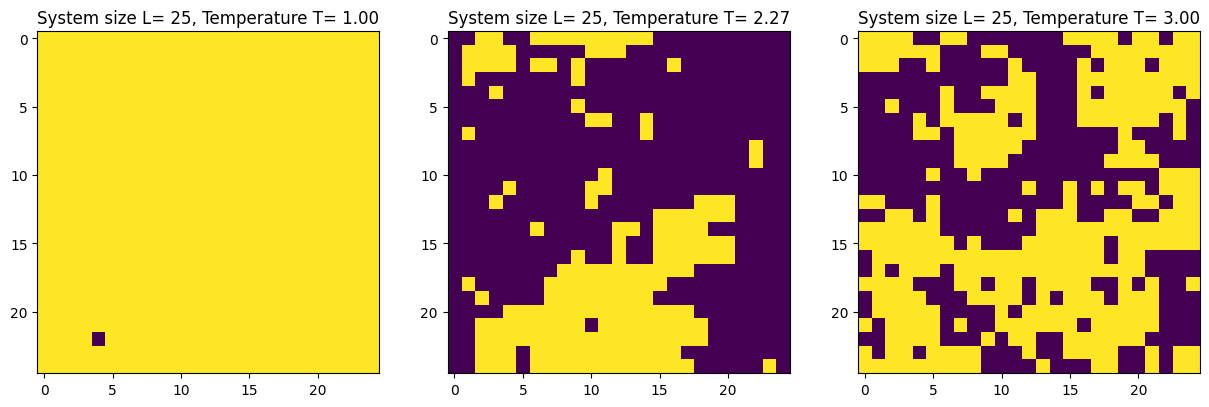

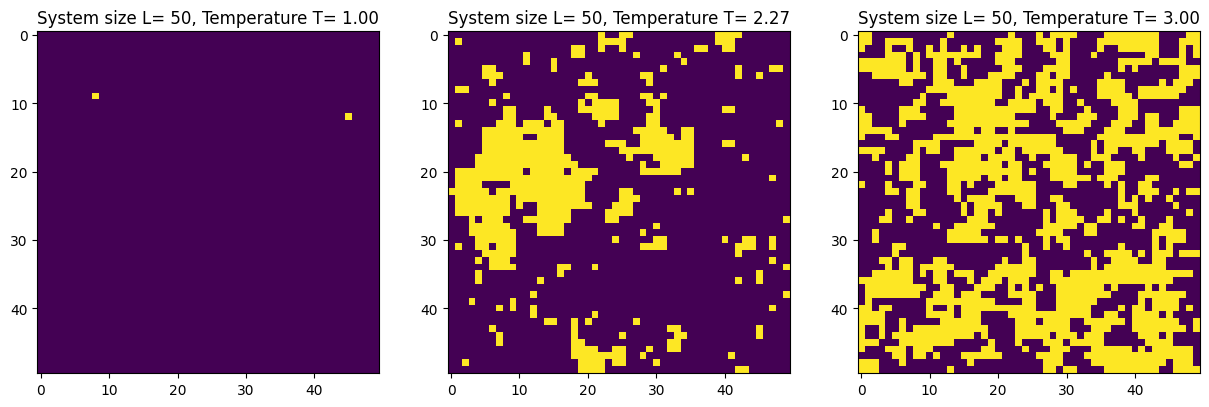

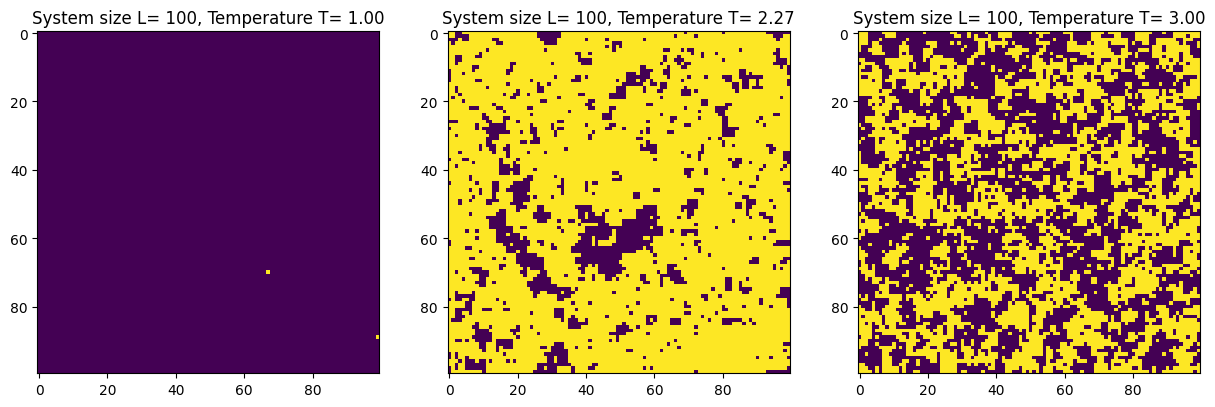

In [3]:
#read in the data from csv file
data = []
with open('Ising_models.csv') as csvfile:
    contents= csv.reader(csvfile, delimiter=";")
    #next(contents)#skip header line
    for row in contents:
        data.append(np.asarray(row).astype('int'))
k=0

for j, L in enumerate(Ls):
    fig,axs =plt.subplots(1,3,figsize=(15,5))

    for i,T in enumerate(Ts):
        Matrix= np.reshape(data[k],(L,L))
        axs[i].imshow(Matrix)
        k+=1
        axs[i].set_title("System size L= %d, Temperature T= %.2f"%(L,T))
    

One can see the behaviour one would expect from the Ising model. At temperatures below the critical temperature $T_c$, the system enters a very uniform spin conformation, with only miniscule deviations. Close to $T_c$, there are big clusters of same spins together. Above $T_c$, there are finer grained clusters of spins, with no clearly visible prefered direction.

During the simulation, the average magnetisation per spin and the total energy per spin were also calculated, and these are plotted below for all system sizes.

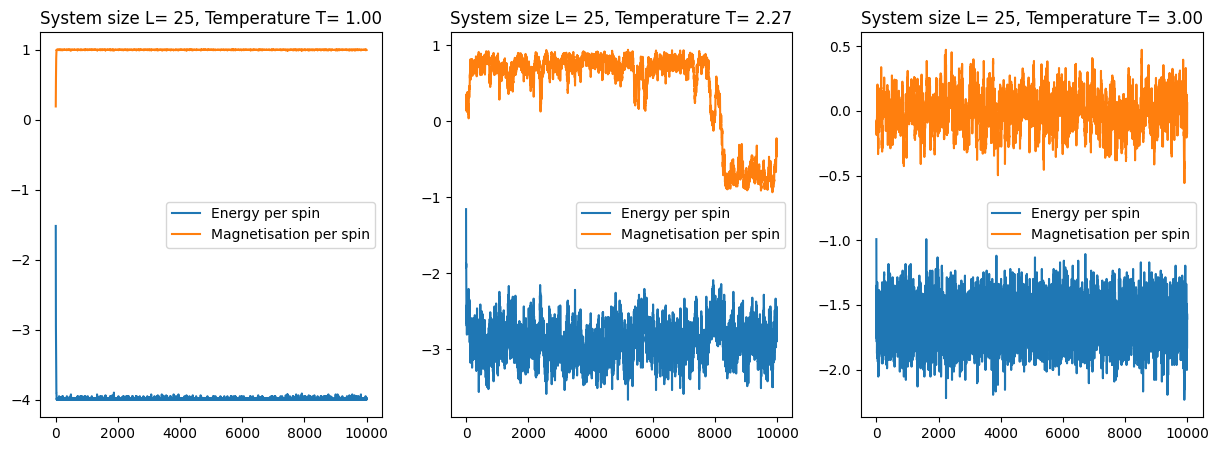

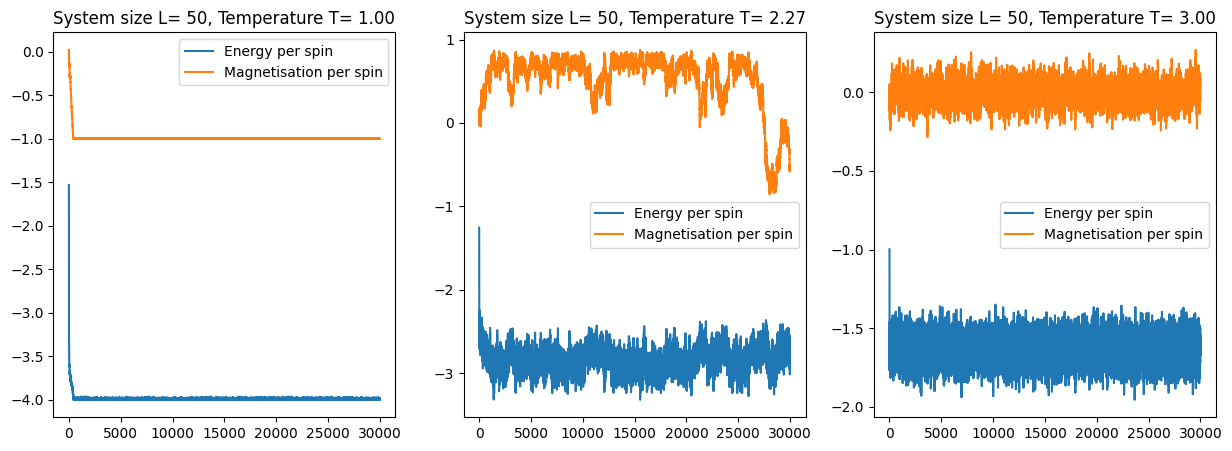

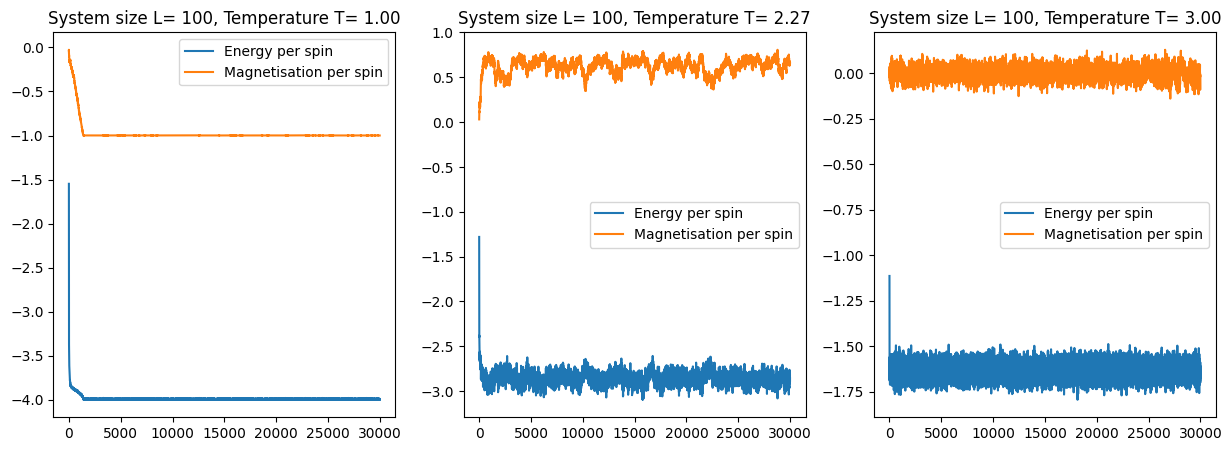

In [4]:
#read in the data from csv file
data = []
with open('Ising_data.csv') as csvfile:
    contents= csv.reader(csvfile, delimiter=";")
    next(contents)#skip header line
    for row in contents:
        data.append(np.asarray(row).astype('float64'))


k=0
for j, L in enumerate(Ls):
    fig,axs =plt.subplots(1,3,figsize=(15,5))
    N_range= np.arange(0,Ns[j])



    for i,T in enumerate(Ts):
        Magnetisations= data[k]
        k+=1
       
        Energies=data[k]
        k+=1
        axs[i].plot(N_range, Energies,label="Energy per spin")
        axs[i].plot(N_range, Magnetisations,label="Magnetisation per spin")
        axs[i].legend()
        
        #axs[i].set_xlim(0,2000) #toggle on to have a look at origin to find equilibrium times
        #axs[i].set_ylim(-4.4,10)
        axs[i].set_title("System size L= %d, Temperature T= %.2f"%(L,T))
    #axs[0].vlines(T_eq[j],-4.3,4.3,ls="--",color="red")




During the simulation, the magnetisation per spin of a Microstate $C$ with spins $\sigma_i(C) = \pm 1$ was calculated with
$$ M(C) = \sum_i \sigma_i(C)$$
and the total energy per spin with 
$$ E(C) = - J \sum_{<i,j>} \sigma_i(C) \sigma_j(C)$$

Below the critical temperature, one can clearly see the system equlibrating in the beginning, reaching a very stable state of near constant enenergy and magnetisation. From these plots, the equlibrium time was estimated by zooming in to the early part of the simulation and roughly estimating, when the stable behaviour is reached in both energy and magnetisation. As there is plenty of data after the qulibration, I was not very conservative in my estimation, and settled on $t_{eq} = 50$ for $L=25$, $t_{eq}= 500$ for $L=50$ and $t_{eq}= 1700$ for $L=100$.

For the simulations close to or above the critical temperature as expected one cannot see such an equlibrium being reached. I simply used the previously determined equlibrium times as an estimator of all equlibrium times.
Close to the critical temperature, there seems to be a predominating spin. For the small and medium system size, this predominating spin changes sometimes, while in the largest system, while there are large fluctuations in the magnetisation, the predominant spin remains in one direction. 

Above the critical temperature, the magentisation fluctuates around $M=0$ for all system sizes. The spins are in a disorderd phase. The energy too fluctuates around the same value in all three system sizes.
Here another important difference between the system sizes is the most obvious: the amplitude of the fluctuation around the mean magnetisation and mean energy gets smaller with larger system size. This is also the case for the other temperatures, although it is not as obvious from looking at the plots. The variance of the energy goes into the specific heat 
$$  C_V=\frac{ \langle E^2 \rangle - \langle E\rangle ^2}{k_B T^2}  $$
and the variance of the magnetisation goes into the magnetic susceptibility
$$  \chi_T = \frac{ \langle m^2 \rangle - \langle m\rangle ^2}{k_B T}$$ 

The ensemble average of the energy and Magnetisation, as well as the spec. heat and mag. susceptibility are estimated from the simulation according to these formulas and then listed below.

In [36]:

ensemble_magnetisations=np.empty((3,3))
ensemble_energies=np.empty((3,3))
mag_variances=np.empty((3,3))
en_variances=np.empty((3,3))
k=0
for j, L in enumerate(Ls):
    
    for i,T in enumerate(Ts):
        Magnetisations= data[k][T_eq[j]::]
        
        ensemble_magnetisations[j][i]=np.mean(Magnetisations)
        mag_variances[j][i]=np.var(Magnetisations)
        
        k+=1
       
        Energies=data[k][T_eq[j]::]
        k+=1
        ensemble_energies[j][i]=np.mean(Energies)
        en_variances[j][i]=np.var(Energies)

specific_heat=np.empty((3,3))
specific_heat[0]= en_variances[0]*Ls[0]**2/Ts**2
specific_heat[1]= en_variances[1]*Ls[1]**2/Ts**2
specific_heat[2]= en_variances[2]*Ls[2]**2/Ts**2
mag_susceptibility = mag_variances/Ts
print(mag_susceptibility)


for i,L in enumerate(Ls):
    print("****************************************************************\n                  System size: L= %s"%L)
    for j, T in enumerate(Ts):
    
        print(" T = %.2f : Mean Energy: %.5f | Mean Magnetisation: %.5f | Spec. Heat: %.5f | Magn. Susceptibility: %f" %(T,ensemble_energies[i,j],ensemble_magnetisations[i,j], specific_heat[i,j],mag_susceptibility[i,j]))


[[5.24955413e-06 2.74468357e-01 1.32069809e-02]
 [2.61875372e-06 9.95370917e-02 3.07464292e-03]
 [3.14826730e-07 5.07284450e-03 7.49967287e-04]]
****************************************************************
                  System size: L= 25
 T = 1.00 : Mean Energy: -3.99410 | Mean Magnetisation: 0.99925 | Spec. Heat: 0.09692 | Magn. Susceptibility: 0.000005
 T = 2.27 : Mean Energy: -2.90095 | Mean Magnetisation: 0.44572 | Spec. Heat: 6.24564 | Magn. Susceptibility: 0.274468
 T = 3.00 : Mean Energy: -1.63299 | Mean Magnetisation: 0.00086 | Spec. Heat: 1.62236 | Magn. Susceptibility: 0.013207
****************************************************************
                  System size: L= 50
 T = 1.00 : Mean Energy: -3.99429 | Mean Magnetisation: -0.99926 | Spec. Heat: 0.09760 | Magn. Susceptibility: 0.000003
 T = 2.27 : Mean Energy: -2.84602 | Mean Magnetisation: 0.53068 | Spec. Heat: 9.10633 | Magn. Susceptibility: 0.099537
 T = 3.00 : Mean Energy: -1.63482 | Mean Magnetisation:

### Exercise 5.2 Integrated correlation time and critical slowing down

The results of the simulation over time are autocorrelated, which needs to be taken into account in error calculations as measurements close in time are likely to be dependent on each other. As a measure for what "close in time" means in this context, one can look at the autocorrelation function, which is calculated from a trajectory of an observable $O$ by the following :
$$ C_o(t) = = \frac{1}{t_{max}-t} \sum_{t'=0}^{t_{max}-t} [O(t')-<O>] [O(t+t')- <O> ] $$

This implemented quite efficently with vectorisation below.

The Correlation goes to zero with an exponential decay $$
C_o(t) \sim exp \left( \frac{t}{\tau^o_{int}} \right) $$
with a rate parameter $\tau ^o_{int}$ called the autocorrelation time, $t$. This is a measure of after how much time (or in this case, after how many monte carlo steps) two values can be assumed to be uncorrelated.

The autocorrelation function of all the energy and magnetisation trajectories is plotted below, with the estimated rate parameters from an exponential fit added in the text boxes.

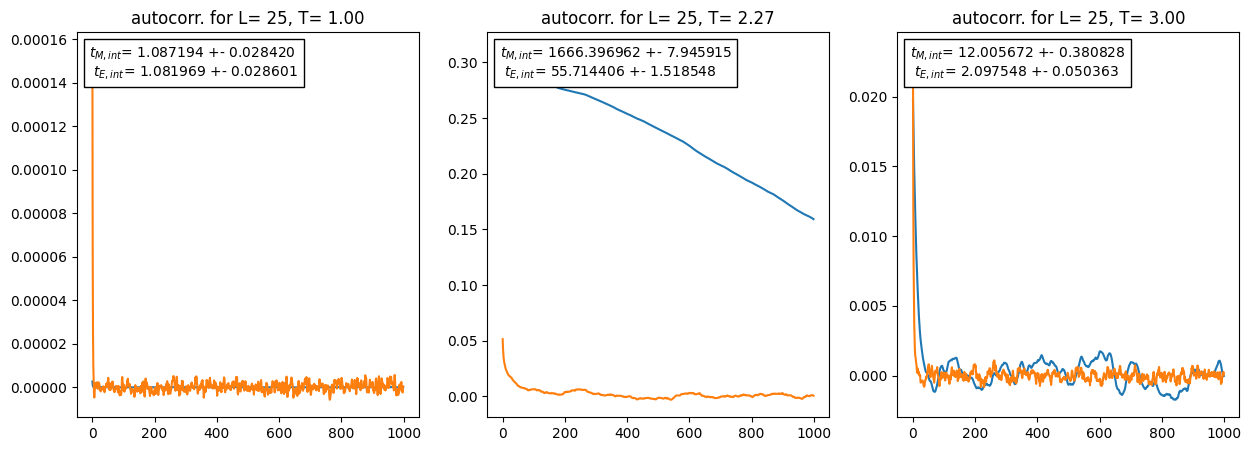

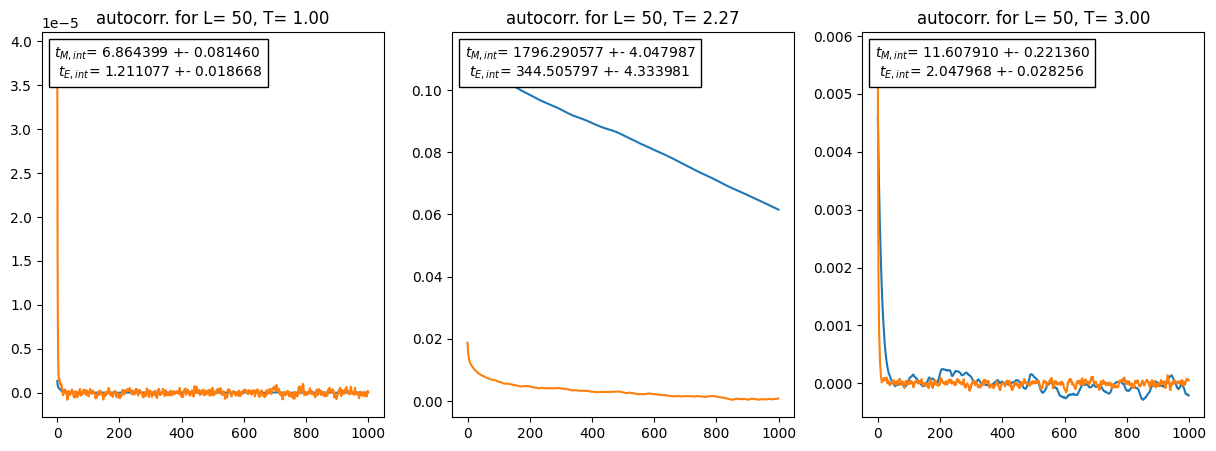

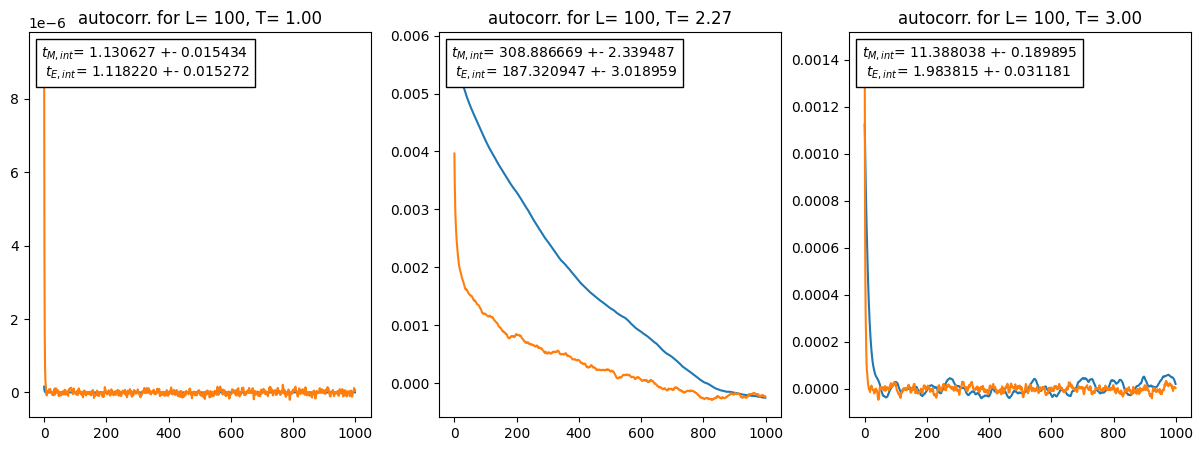

In [6]:
def exp(x,tau,a):
    return a*np.exp(-x/tau)

def calc_autocorrellation(array, lag_max, t_eq):
    array=array[t_eq::]
    array_centered= array-np.average(array)
    N_samples= len(array)
    autocov = np.empty(lag_max)
    lagtimes=np.arange(0,lag_max)
    for j in range(lag_max):
        autocov[j] = np.dot(array_centered[:N_samples - j],array_centered[j:])
    autocov /= (N_samples-lagtimes)
    return autocov

#print(calc_autocorrellation(data[0],lagmax,T_eq[0]))
lagmax=1000
k=0
auto_times=[]
for j, L in enumerate(Ls):
    fig,axs =plt.subplots(1,3,figsize=(15,5))
    lagtimes=np.arange(0,lagmax)

    for i,T in enumerate(Ts):
        Mag_autocorr= calc_autocorrellation(data[k],lagmax,T_eq[j])
        popt1,pcov1=scipy.optimize.curve_fit(exp,lagtimes,Mag_autocorr)
        
        k+=1
        En_autocorr=calc_autocorrellation(data[k],lagmax,T_eq[j])
        popt2,pcov2=scipy.optimize.curve_fit(exp,lagtimes,En_autocorr)
        k+=1
        auto_times.append(popt2[0])
        anchored_text = AnchoredText("$t_{M,int}$= %f +- %f\n $t_{E,int}$= %f +- %f"%(popt1[0],np.sqrt(pcov1[0][0]),popt2[0],np.sqrt(pcov2[0][0])),loc=2)
        axs[i].plot(lagtimes,Mag_autocorr )
        axs[i].plot(lagtimes, En_autocorr)
        axs[i].add_artist(anchored_text)
        axs[i].set_title("autocorr. for L= %d, T= %.2f"%(L,T))
        #axs[i].set_yscale("log")


Below the critical Temperatures, the trajectories are the least correlated, above the critical temperatures slightly more. Close to the critical temperature, the autocorrelation times are magnitudes bigger than outside the critical range. One needs to take this into account to get a more accurate estimate of the errors of the  ensemble magnetisation and energy, the corrected standard error of the mean is given by

$$ S^2_{t_{max}}= \frac{1}{t_{max} - \tau_{eq}-1} \sum_{t=\tau_{eq}}^{t_{max}} (O_t-O_{t_{max}})^2$$

The results of the ensemble means and corrected error are listed below.

In [37]:
def S2_corr(observable,t_eq,t_corr):
    t_max=len(observable)
    return (1+2*t_corr)/(t_max-t_eq-1)*np.var(observable[t_eq:])
S2_corr_mags=[]
S2_corr_ens=[]

k=0
for j, L in enumerate(Ls):
    for i, T in enumerate(Ts):
        S2_corr_mags.append(S2_corr(data[k],T_eq[j],auto_times[3*j+i]))
        k+=1
      
        S2_corr_ens.append(S2_corr(data[k],T_eq[j],auto_times[3*j+i]))
        k+=1
S2_corr_ens = np.reshape(S2_corr_ens, (3,3))
S2_corr_mags = np.reshape(S2_corr_mags, (3,3))

for i,L in enumerate(Ls):
    print("****************************************************************\n                  System size: L= %s"%L)
    for j, T in enumerate(Ts):
    
        print(" T = %.2f : Mean Energy: %.5f +- %E | Mean Magnetisation: %.5f +- %E " %(T,ensemble_energies[i,j],S2_corr_ens[i,j] ,ensemble_magnetisations[i,j], S2_corr_mags[i,j]))

****************************************************************
                  System size: L= 25
 T = 1.00 : Mean Energy: -3.99410 +- 4.956230E-08 | Mean Magnetisation: 0.99925 +- 8.389366E-10 
 T = 2.27 : Mean Energy: -2.90095 +- 5.844172E-04 | Mean Magnetisation: 0.44572 +- 3.536866E-03 
 T = 3.00 : Mean Energy: -1.63299 +- 1.226059E-05 | Mean Magnetisation: 0.00086 +- 1.039674E-05 
****************************************************************
                  System size: L= 50
 T = 1.00 : Mean Energy: -3.99429 +- 4.513925E-09 | Mean Magnetisation: -0.99926 +- 1.513865E-10 
 T = 2.27 : Mean Energy: -2.84602 +- 4.372426E-04 | Mean Magnetisation: 0.53068 +- 2.632718E-03 
 T = 3.00 : Mean Energy: -1.63482 +- 9.921138E-07 | Mean Magnetisation: -0.00088 +- 7.940225E-07 
****************************************************************
                  System size: L= 100
 T = 1.00 : Mean Energy: -3.99432 +- 1.073701E-09 | Mean Magnetisation: -0.99928 +- 1.809865E-11 
 T = 2.27 :

##### : Finite Size Analysis and critical exponents
Finally, the effect of the system size is determined according to section (1.9) in the script, and the critical exponents  can be determined from looking at some observables close to the critical temperature for different system sizes. As T gets close to the critical temperature, and L becomes larger,  the following expressions  should hold: 
$$ M(T)/V \sim (T_c-T)^\beta \sim L^{-\beta/\nu}$$
$$ \chi(T)/V \sim (T_c-T)^{-\gamma} \sim L^{\gamma/\nu}$$
$$ C_v(T)/V \sim (T_c-T)^{-\alpha} \sim L^{\alpha/\nu}$$

For this 2d Ising model, $\nu = 1$ and the theoretical values are $$ \alpha = 0, \beta =1/8 , \gamma = 7/4$$
The error in the following is simply an estimation based on the covariance of the fit parameters. In the case of beta, it seems like the fit is very good, although the estimate for beta is very close to double the theoretical value. This points to something having gone a little wrong in my calculations, but generally the estimation goes in the right direction

[-0.80807103 -0.63360259 -0.46525188]
beta = 0.247292 +- 0.002548 , theoretical : 0.125000
alpha = 0.151091 +- 0.226858, theoretical : 0
gamma = 2.878851 +- 0.817249, theoretical : 1.750000 


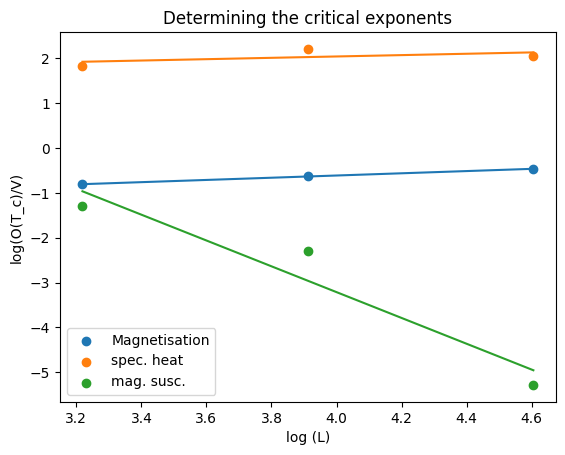

In [43]:
log_L= np.log(Ls)
print(np.log(ensemble_magnetisations.T[1]))
log_M_V = np.log(ensemble_magnetisations.T[1])
log_C_v = np.log(specific_heat.T[1])
log_X_v = np.log(mag_susceptibility.T[1])

def linear (x,a,b):
    return a*x+b

popt_M,pcov_M = scipy.optimize.curve_fit(linear,log_L, log_M_V)
beta= popt_M[0]
popt_C,pcov_C = scipy.optimize.curve_fit(linear,log_L, log_C_v)
alpha=popt_C[0]
popt_X,pcov_X = scipy.optimize.curve_fit(linear,log_L, log_X_v)
gamma=-popt_X[0]


plt.plot(log_L, linear(log_L, *popt_M))
plt.plot(log_L, linear(log_L, *popt_C))
plt.plot(log_L, linear(log_L, *popt_X))

print("beta = %f +- %f , theoretical : %f" %(beta,np.sqrt( pcov_M[0,0]),1/8))
print("alpha = %f +- %f, theoretical : 0"%(alpha,np.sqrt( pcov_C[0,0])))
print("gamma = %f +- %f, theoretical : %f " %(gamma,np.sqrt( pcov_X[0,0]),7/4))



plt.title("Determining the critical exponents")
plt.xlabel("log (L)")
plt.ylabel("log(O(T_c)/V)")
plt.scatter(log_L,log_M_V, label="Magnetisation")
plt.scatter(np.log(Ls), log_C_v, label="spec. heat")
plt.scatter(np.log(Ls), log_X_v, label= "mag. susc.")
plt.legend()

In [9]:
#test version